# Import libraries

In [3]:
import os
import csv
import pandas as pd
import numpy as np
import re # Import re for regular expressions
from functools import reduce

import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [55]:
# Set the working directory
p = r"C:/Users/saram/Desktop/Erdos_Institute/project-2025/lobby-data"

In [56]:
# Read the CSV file into a DataFrame
df = pd.read_csv(p + r"\lobbied_bills.csv", sep=",", dtype=str)
print(df.shape)
df

(5907557, 15)


,b_id,bill_name,congno,issue,specificissue,client,amount,catcode,lobbyists_list,lobbyist_count,official_position,formercongmen,agency_list,agency_count,year
0,hr2397-113,H.R.2397,113,Fed Budget & Appropriations,"H.R. 2397, Department of Defense Appropriation...",MICHELIN NORTH AMERICA,70000.0,T2200,"Harrison, Jaime R | Holly, Josh | Morra, Eliza...",4,True,False,Executive Office of the President | Office of ...,4,2013
1,s351-113,S.351,113,Medicare & Medicaid,H.R. 351 - Protecting Seniors' Access to Medic...,GLAXOSMITHKLINE,420000.0,H4300,"Heimberg, Gary A | Kilcoyne, Shira | Mcgowan, ...",8,True,False,Dept of Commerce | Dept of State | Office of U...,5,2013
2,hr1326-113,H.R.1326,113,Health Issues,"H.R. 1326, Health Care Price Transparency Prom...",AMERICA'S HEALTH INSURANCE PLANS,3630000.0,F3200,"Allen, Jeremy | Assatourians, Liza | Bocchino,...",26,True,False,Agency for Health Care Policy & Research | Cen...,18,2013
3,s917-113,S.917,113,Taxes,General interest to amend the IRC to reduce th...,MILLERCOORS LLC,30000.0,G2810,"Kaniewski, Donald J",1,True,False,US House of Representatives | US Senate,2,2013
4,hr351-113,H.R.351,113,Medicare & Medicaid,**see addendum pagePL 111-148 - The Patient Pr...,PHARMACEUTICAL RESEARCH & MANUFACTURERS OF AME...,70000.0,H4300,"Downs, Raissa H | Easton, Michelle P | Fordjou...",5,True,False,Centers for Medicare & Medicaid Services | US ...,3,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5907552,hr5781-117,H.R.5781,117,Environment & Superfund,CLEAN Future Act Lifecycle Thinking and Analys...,NATIONAL READY MIXED CONCRETE ASSN,319153.0,B5100,"Tyrrell, Andrew",1,True,False,Dept of Housing & Urban Development | Dept of ...,9,2023
5907553,s2836-117,S.2836,117,Environment & Superfund,CLEAN Future Act Lifecycle Thinking and Analys...,NATIONAL READY MIXED CONCRETE ASSN,319153.0,B5100,"Tyrrell, Andrew",1,True,False,Dept of Housing & Urban Development | Dept of ...,9,2023
5907554,hr1488-118,H.R.1488,118,Health Issues,Issues related to prescription drug coverage a...,PHARMACEUTICAL CARE MANAGEMENT ASSN,2764027.0,H4400,"Bass, Kristin | Heafitz, Jonathan | Murphy, Ka...",5,True,False,Centers for Medicare & Medicaid Services | Dep...,5,2023
5907555,hr1770-118,H.R.1770,118,Health Issues,Issues related to prescription drug coverage a...,PHARMACEUTICAL CARE MANAGEMENT ASSN,2764027.0,H4400,"Bass, Kristin | Heafitz, Jonathan | Murphy, Ka...",5,True,False,Centers for Medicare & Medicaid Services | Dep...,5,2023


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907557 entries, 0 to 5907556
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   b_id               object
 1   bill_name          object
 2   congno             object
 3   issue              object
 4   specificissue      object
 5   client             object
 6   amount             object
 7   catcode            object
 8   lobbyists_list     object
 9   lobbyist_count     object
 10  official_position  object
 11  formercongmen      object
 12  agency_list        object
 13  agency_count       object
 14  year               object
dtypes: object(15)
memory usage: 676.1+ MB


# Shorten the dataset

In [5]:
df.columns

Index(['b_id', 'bill_name', 'congno', 'issue', 'specificissue', 'client',
       'amount', 'catcode', 'lobbyists_list', 'lobbyist_count',
       'official_position', 'formercongmen', 'agency_list', 'agency_count',
       'year'],
      dtype='object')

In [6]:
# Drop columns that are not needed
df_short = df.drop(columns=[
    'specificissue', 
    'lobbyists_list', 
    'client',
    'official_position',
    'formercongmen',
    'agency_list'
], errors="ignore")

In [ ]:
# Save 
# df_short.to_csv(p + "\shorten_lobbied_bills.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\saram\AppData\Local\Temp\ipykernel_21224\2583006771.py:2: SyntaxWarning: invalid escape sequence '\s'
  df.to_csv(p + "\shorten_lobbied_bills.csv", index=False)


In [5]:
# Read the CSV file into a DataFrame
df_short = pd.read_csv(p + r"\shorten_lobbied_bills.csv", sep=",", dtype=str)
print(df_short.shape)
df_short

(5907557, 9)


,b_id,bill_name,congno,issue,amount,catcode,lobbyist_count,agency_count,year
0,hr2397-113,H.R.2397,113,Fed Budget & Appropriations,70000.0,T2200,4,4,2013
1,s351-113,S.351,113,Medicare & Medicaid,420000.0,H4300,8,5,2013
2,hr1326-113,H.R.1326,113,Health Issues,3630000.0,F3200,26,18,2013
3,s917-113,S.917,113,Taxes,30000.0,G2810,1,2,2013
4,hr351-113,H.R.351,113,Medicare & Medicaid,70000.0,H4300,5,3,2013
...,...,...,...,...,...,...,...,...,...
5907552,hr5781-117,H.R.5781,117,Environment & Superfund,319153.0,B5100,1,9,2023
5907553,s2836-117,S.2836,117,Environment & Superfund,319153.0,B5100,1,9,2023
5907554,hr1488-118,H.R.1488,118,Health Issues,2764027.0,H4400,5,5,2023
5907555,hr1770-118,H.R.1770,118,Health Issues,2764027.0,H4400,5,5,2023


# EDA (Deep Dive)

In [ ]:
# Coerce dtypes
df["amount"] = pd.to_numeric(df["amount"], errors="coerce")
df["lobbyist_count"] = pd.to_numeric(df["lobbyist_count"], errors="coerce")
df["agency_count"] = pd.to_numeric(df["agency_count"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["congno"] = pd.to_numeric(df["congno"].str.extract(r"(\d+)", expand=False), errors="coerce")

# normalize flags
df["formercongmen"] = df["formercongmen"].fillna("").str.strip().str.upper()

In [19]:
# 1. Which bills are most heavily lobbied (by total amount)
bills_heaviest = (
    df.groupby(["b_id", "bill_name", "congno", "year"], dropna=False)
      .agg(
          total_amount=("amount", "sum"),
          num_clients=("client", "nunique")
      )
      .sort_values("total_amount", ascending=False)
      .reset_index()
)

bills_heaviest.head(20)

,b_id,bill_name,congno,year,total_amount,num_clients
0,hr2029-114,H.R.2029,114.0,2016,1.951775e+10,352
1,s2943-114,S.2943,114.0,2016,1.705757e+10,450
2,hr4909-114,H.R.4909,114.0,2016,1.523692e+10,487
3,s2012-114,S.2012,114.0,2016,1.399950e+10,519
4,hr5485-114,H.R.5485,114.0,2016,1.352441e+10,206
5,s3040-114,S.3040,114.0,2016,1.218870e+10,374
6,hr5538-114,H.R.5538,114.0,2016,1.174752e+10,277
7,s2658-114,S.2658,114.0,2016,1.094046e+10,284
8,hr8-114,H.R.8,114.0,2016,1.085457e+10,273
9,s3068-114,S.3068,114.0,2016,1.066032e+10,208


In [23]:
# 2. Top lobbying clients and industries per bill
# 2a. clients per bill
clients_per_bill = (
    df.groupby(['b_id', 'bill_name', 'client'], dropna=False)
      .agg(amount=('amount', 'sum'))
      .sort_values(['b_id', 'amount'], ascending=[True, False])
      .reset_index()
)
clients_per_bill.head(50)

,b_id,bill_name,client,amount
0,ZZ1000136,H1941,MUTUAL OF OMAHA,158000.0
1,ZZ1000138,SR.189,"PIMA COUNTY, AZ",0.0
2,ZZ1000268,S.AMDT.3450,NATIONAL RESTAURANT ASSN,870000.0
3,ZZ1000282,S.5393,UNIVERSITY OF MICHIGAN,70000.0
4,ZZ1001594,S.6136,NATIONAL EDUCATION ASSN,676000.0
5,ZZ1001837,S.AMDT.4082,NAACP,68750.0
6,ZZ1001867,S.AMDT.4083,NAACP,68750.0
7,ZZ1002374,H.AMDT.927,NATIONAL RIFLE ASSN,785000.0
8,ZZ1002447,SR.189,"PIMA COUNTY, AZ",0.0
9,ZZ1002584,H.AMDT.928,NATIONAL RIFLE ASSN,785000.0


In [24]:
# 2b. industries per bill (catcode)
industries_per_bill = (
    df.groupby(['b_id', 'bill_name', 'catcode'], dropna=False)
      .agg(amount=('amount', 'sum'))
      .sort_values(['b_id', 'amount'], ascending=[True, False])
      .reset_index()
)
industries_per_bill.head(50)

,b_id,bill_name,catcode,amount
0,ZZ1000136,H1941,F3100,158000.0
1,ZZ1000138,SR.189,X3000,0.0
2,ZZ1000268,S.AMDT.3450,G2900,870000.0
3,ZZ1000282,S.5393,H5100,70000.0
4,ZZ1001594,S.6136,L1300,676000.0
5,ZZ1001837,S.AMDT.4082,J7500,68750.0
6,ZZ1001867,S.AMDT.4083,J7500,68750.0
7,ZZ1002374,H.AMDT.927,J6200,785000.0
8,ZZ1002447,SR.189,X3000,0.0
9,ZZ1002584,H.AMDT.928,J6200,785000.0


In [25]:
# 3. Government agencies targeted
# explode agency_list
ag_df = (
    df.assign(agency_list=df['agency_list'].fillna(''))
      .assign(agency_split=lambda x: x['agency_list'].str.split('|'))
      .explode('agency_split')
      .rename(columns={'agency_split': 'agency'})
)
agencies_overall = (
    ag_df.groupby('agency', dropna=True)
         .agg(
             num_records=('b_id', 'count'),
             num_distinct_bills=('b_id', 'nunique'),
             total_amount=('amount', 'sum')
         )
         .sort_values('total_amount', ascending=False)
         .reset_index()
)
agencies_overall.head(50)

,agency,num_records,num_distinct_bills,total_amount
0,US House of Representatives,3692569,61649,3.084725e+12
1,Dept of the Treasury,946439,27732,2.151417e+12
2,US Senate,1185265,33873,2.117119e+12
3,White House,1122264,32414,2.045936e+12
4,Environmental Protection Agency,966055,24330,1.962377e+12
5,Dept of Homeland Security,680149,22521,1.914945e+12
6,Office of Management & Budget,1026783,30049,1.911466e+12
7,Dept of Labor,816061,24967,1.898428e+12
8,Dept of Health & Human Services,964281,25668,1.818220e+12
9,Office of US Trade Representative,677443,17995,1.787707e+12


In [26]:
# agencies per bill
agencies_per_bill = (
    ag_df.groupby(['b_id', 'bill_name', 'agency'], dropna=False)
         .agg(
             total_amount=('amount', 'sum'),
             num_rows=('year', 'count')
         )
         .sort_values(['b_id', 'total_amount'], ascending=[True, False])
         .reset_index()
)

agencies_per_bill.head(50)

,b_id,bill_name,agency,total_amount,num_rows
0,ZZ1000136,H1941,Federal Reserve System,158000.0,1
1,ZZ1000136,H1941,US House of Representatives,158000.0,1
2,ZZ1000136,H1941,US Senate,158000.0,1
3,ZZ1000136,H1941,Dept of Labor,158000.0,1
4,ZZ1000138,SR.189,Dept of Transportation,0.0,1
5,ZZ1000138,SR.189,US House of Representatives,0.0,1
6,ZZ1000138,SR.189,US Senate,0.0,1
7,ZZ1000138,SR.189,Army Corps of Engineers,0.0,1
8,ZZ1000268,S.AMDT.3450,Dept of Education,870000.0,1
9,ZZ1000268,S.AMDT.3450,Dept of Energy,870000.0,1


In [27]:
# 4. Patterns of revolving door influence
# a) bills that involve former members of Congress
revolving_bills = (
    df.assign(is_former=lambda x: x['formercongmen'].fillna('').str.upper().isin(['Y', 'YES', '1']))
      .groupby(['b_id', 'bill_name'], dropna=False)
      .agg(
          total_amount=('amount', 'sum'),
          any_former=('is_former', 'max'),
          num_former_rows=('is_former', 'sum'),
          total_lobbyists=('lobbyist_count', 'sum')
      )
      .sort_values('total_amount', ascending=False)
      .reset_index()
)

revolving_bills[revolving_bills['any_former'] == True].head(50)

,b_id,bill_name,total_amount,any_former,num_former_rows,total_lobbyists


In [28]:
# b) compare spending when former members present vs not
rev_vs_nonrev = (
    df.assign(is_former=lambda x: x['formercongmen'].fillna('').str.upper().isin(['Y', 'YES', '1']))
      .groupby('is_former')
      .agg(
          total_amount=('amount', 'sum'),
          mean_amount=('amount', 'mean'),
          bills=('b_id', 'nunique')
      )
      .reset_index()
)

rev_vs_nonrev

,is_former,total_amount,mean_amount,bills
0,False,3.457763e+12,585311.875402,72981


In [29]:
# c) which clients most often use former members
clients_revolving = (
    df.assign(is_former=lambda x: x['formercongmen'].fillna('').str.upper().isin(['Y', 'YES', '1']))
      .groupby('client', dropna=False)
      .agg(
          total_amount=('amount', 'sum'),
          bills=('b_id', 'nunique'),
          uses_former=('is_former', 'max'),
          former_hits=('is_former', 'sum')
      )
      .sort_values(['uses_former', 'total_amount'], ascending=[False, False])
      .reset_index()
)

clients_revolving.head(50)

,client,total_amount,bills,uses_former,former_hits
0,US CHAMBER OF COMMERCE,1.188143e+12,3393,False,0
1,NATIONAL ASSN OF REALTORS,3.086994e+11,776,False,0
2,PHARMACEUTICAL RESEARCH & MANUFACTURERS OF AME...,5.839195e+10,1244,False,0
3,AMERICAN HOSPITAL ASSN,4.175449e+10,464,False,0
4,AT&T INC,3.931676e+10,828,False,0
5,ABBVIE INC,3.831887e+10,316,False,0
6,AMERICA'S HEALTH INSURANCE PLANS,3.546273e+10,1607,False,0
7,AMERICAN CHEMISTRY COUNCIL,3.447286e+10,687,False,0
8,AMERICAN MEDICAL ASSN,3.281725e+10,968,False,0
9,AARP,3.026750e+10,1097,False,0


# EDA (on the shorter dataset)

## Structural check

In [23]:
df_short.shape

(5907557, 9)

In [6]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907557 entries, 0 to 5907556
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   b_id            object
 1   bill_name       object
 2   congno          object
 3   issue           object
 4   amount          object
 5   catcode         object
 6   lobbyist_count  object
 7   agency_count    object
 8   year            object
dtypes: object(9)
memory usage: 405.6+ MB


In [7]:
# Coerce dtypes
num_cols = ["amount", "lobbyist_count", "agency_count", "year", "congno"]
for c in num_cols:
    df_short[c] = pd.to_numeric(df_short[c], errors="coerce")

str_cols = [c for c in df_short.columns if c not in num_cols]
df_short[str_cols] = df_short[str_cols].apply(lambda x: x.astype("string"))

## Duplicates

In [26]:
# Check full-row duplicates
dupe_full = df_short.duplicated().sum()
print(f"Exact duplicate rows: {dupe_full}")

Exact duplicate rows: 4551506


In [27]:
# Inspect them if any
if dupe_full > 0:
    display(df_short[df_short.duplicated(keep=False)].head())

,b_id,bill_name,congno,issue,amount,catcode,lobbyist_count,agency_count,year
3,s917-113,S.917,113.0,Taxes,30000.0,G2810,1.0,2.0,2013
4,hr351-113,H.R.351,113.0,Medicare & Medicaid,70000.0,H4300,5.0,3.0,2013
9,hr624-113,H.R.624,113.0,Energy & Nuclear Power,75000.0,E1600,1.0,2.0,2013
10,hr3107-113,H.R.3107,113.0,Homeland Security,567000.0,E1140,4.0,2.0,2013
11,hr1619-113,H.R.1619,113.0,Medical Research & Clin Labs,130000.0,X4000,4.0,7.0,2013


In [32]:
# Check duplicates by bill identifier (b_id)
dupe_by_bill = df_short.duplicated(subset=["b_id"]).sum()
print(f"Rows sharing the same b_id: {dupe_by_bill}")

Rows sharing the same b_id: 5834576


In [35]:
# Check for repeated combinations that should be unique
dupe_combo = df_short.duplicated(subset=["b_id", "year", "catcode", "issue"]).sum()
print(f"Duplicate rows by (b_id, year, catcode, issue): {dupe_combo}")

Duplicate rows by (b_id, year, catcode, issue): 5440914


In [30]:
# Optional: view a few of those combinations if they exist
if dupe_combo > 0:
    dupes = df_short[df_short.duplicated(subset=["b_id", "year", "catcode", "issue"], keep=False)]
    display(dupes.sort_values(["b_id", "year"]).head(20))

,b_id,bill_name,congno,issue,amount,catcode,lobbyist_count,agency_count,year
362188,h1-114,H.R.1,114.0,Immigration,30000.0,C5110,6.0,2.0,2015
362887,h1-114,H.R.1,114.0,Immigration,80000.0,C5200,8.0,2.0,2015
367595,h1-114,H.R.1,114.0,Immigration,580359.0,C5110,8.0,17.0,2015
367689,h1-114,H.R.1,114.0,"Labor, Antitrust & Workplace",300000.0,C5100,8.0,13.0,2015
367690,h1-114,H.R.1,114.0,Immigration,300000.0,C5100,8.0,13.0,2015
370356,h1-114,H.R.1,114.0,Immigration,140000.0,H5100,3.0,4.0,2015
374209,h1-114,H.R.1,114.0,Immigration,60000.0,E1600,8.0,1.0,2015
376576,h1-114,H.R.1,114.0,Immigration,14690000.0,G1100,89.0,46.0,2015
379626,h1-114,H.R.1,114.0,Immigration,90000.0,H5100,3.0,2.0,2015
380571,h1-114,H.R.1,114.0,Immigration,30000.0,C5120,1.0,2.0,2015


In [ ]:
# Before cleanup
print(f"Rows before deduplication: {len(df_short):,}")

# Remove exact duplicate rows (all columns identical)
df_short = df_short.drop_duplicates(keep="first").reset_index(drop=True)

# After cleanup
print(f"Rows after deduplication: {len(df_short):,}")

Rows before deduplication: 5,907,557
Rows after deduplication: 1,356,051


## Statistics 

In [37]:
df_short[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
amount,1356051.0,745471.050383,2.550596e+06,0.0,40000.0,107500.0,460000.0,130090000.0
lobbyist_count,1356051.0,6.069080,1.105472e+01,0.0,2.0,3.0,6.0,92.0
agency_count,1356051.0,7.700866,8.438754e+00,0.0,2.0,5.0,10.0,64.0
year,1356051.0,2017.823055,2.913556e+00,2013.0,2015.0,2018.0,2020.0,2023.0
congno,1356051.0,115.105571,1.446325e+00,107.0,114.0,115.0,116.0,118.0


In [38]:
df_short.describe(include='all')

,b_id,bill_name,congno,issue,amount,catcode,lobbyist_count,agency_count,year
count,1356051,1356051,1.356051e+06,1356051,1.356051e+06,1356051,1.356051e+06,1.356051e+06,1.356051e+06
unique,72981,16809,NaN,80,NaN,451,NaN,NaN,NaN
top,hr5376-117,H.R.5376,NaN,Health Issues,NaN,H5100,NaN,NaN,NaN
freq,12932,12961,NaN,148431,NaN,47566,NaN,NaN,NaN
mean,NaN,NaN,1.151056e+02,NaN,7.454711e+05,NaN,6.069080e+00,7.700866e+00,2.017823e+03
std,NaN,NaN,1.446325e+00,NaN,2.550596e+06,NaN,1.105472e+01,8.438754e+00,2.913556e+00
min,NaN,NaN,1.070000e+02,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.013000e+03
25%,NaN,NaN,1.140000e+02,NaN,4.000000e+04,NaN,2.000000e+00,2.000000e+00,2.015000e+03
50%,NaN,NaN,1.150000e+02,NaN,1.075000e+05,NaN,3.000000e+00,5.000000e+00,2.018000e+03
75%,NaN,NaN,1.160000e+02,NaN,4.600000e+05,NaN,6.000000e+00,1.000000e+01,2.020000e+03


In [39]:
# Nulls and completeness
df_short.isna().mean().sort_values(ascending=False).head(20)

b_id              0.0
bill_name         0.0
congno            0.0
issue             0.0
amount            0.0
catcode           0.0
lobbyist_count    0.0
agency_count      0.0
year              0.0
dtype: float64

In [40]:
df_short['agency_count'] = df_short['agency_count'].fillna(0)
df_short['lobbyist_count'] = df_short['lobbyist_count'].fillna(0)
df_short['congno'] = df_short['congno'].fillna(df_short['congno'].mode()[0])

In [41]:
# Cardinality
df_short.nunique().sort_values(ascending=False).head(20)

b_id              72981
bill_name         16809
amount            10190
catcode             451
issue                80
agency_count         56
lobbyist_count       54
year                 11
congno               10
dtype: int64

## Which bills, issues, or industries dominate spending

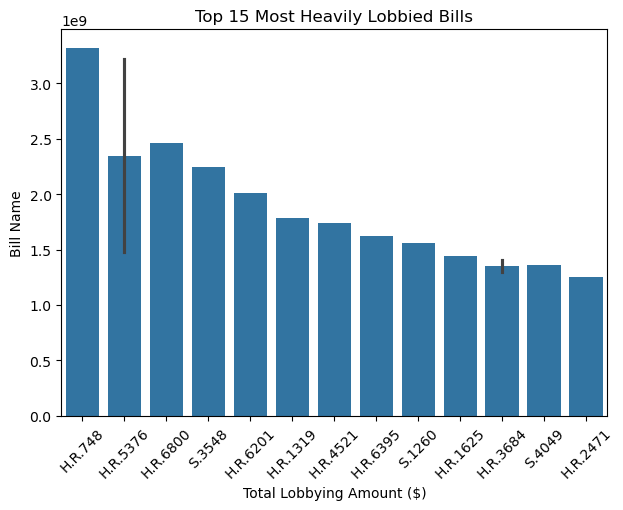

In [42]:
# Most heavily lobbied bills
by_bill = (
    df_short.groupby(["b_id", "bill_name", "congno", "year"], dropna=False)
      .agg(
          total_amount=("amount", "sum"),
          total_lobbyists=("lobbyist_count", "sum"),
          total_agencies=("agency_count", "sum")
      )
      .sort_values("total_amount", ascending=False)
      .reset_index()
)

# top 15 bills
sns.barplot(x="bill_name", y="total_amount", data=by_bill.head(15))
plt.title("Top 15 Most Heavily Lobbied Bills")
plt.xlabel("Total Lobbying Amount ($)")
plt.ylabel("Bill Name")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

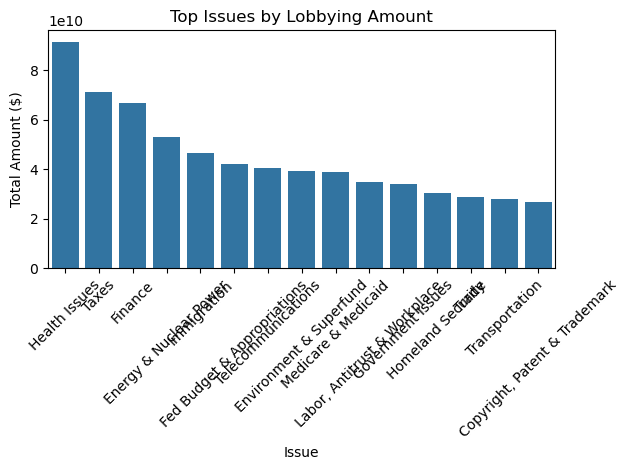

In [43]:
# Top issues by total lobbying amount 
by_issue = (
    df_short.groupby("issue", dropna=False)["amount"]
      .sum()
      .sort_values(ascending=False)
)
sns.barplot(x=by_issue.index[:15], y=by_issue.values[:15])
plt.title("Top Issues by Lobbying Amount")
plt.xlabel("Issue")
plt.ylabel("Total Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

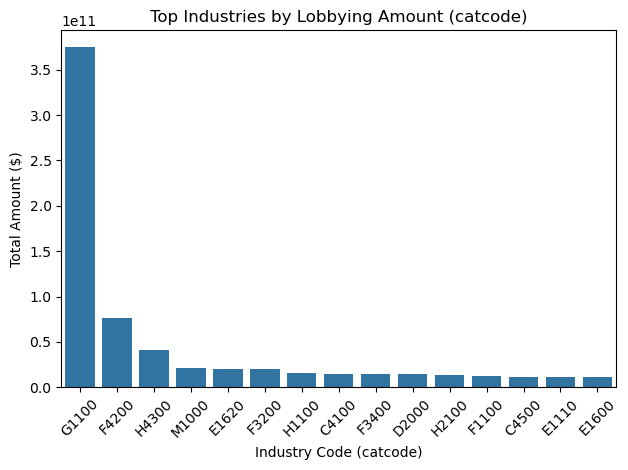

In [44]:
# Top industries by total lobbying amount
by_catcode = (
    df_short.groupby("catcode", dropna=False)["amount"]
      .sum()
      .sort_values(ascending=False)
)
sns.barplot(x=by_catcode.index[:15], y=by_catcode.values[:15])
plt.title("Top Industries by Lobbying Amount (catcode)")
plt.xlabel("Industry Code (catcode)")
plt.ylabel("Total Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation structure among numeric variables

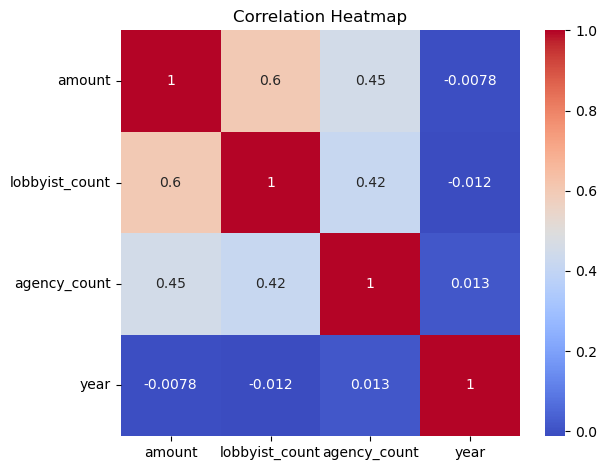

In [45]:
corr = df_short[["amount", "lobbyist_count", "agency_count", "year"]].corr(method="spearman")
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

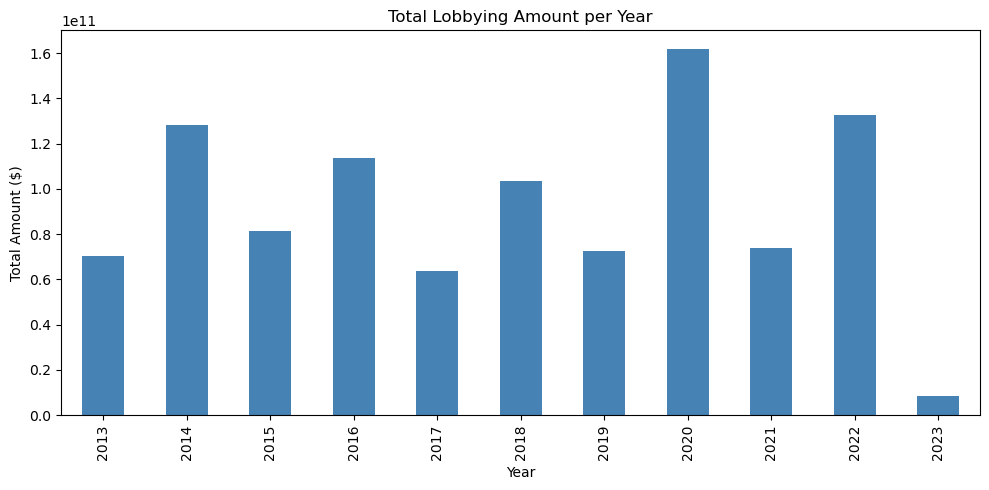

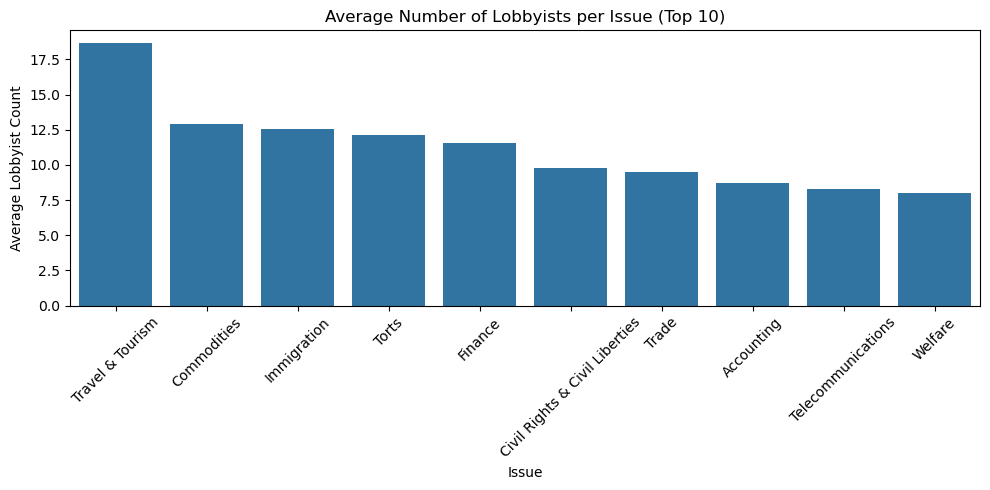

In [46]:
# Temporal trend: total lobbying amount per year

plt.figure(figsize=(10,5))
df_short.groupby("year")["amount"].sum().plot(kind="bar", color="steelblue")
plt.title("Total Lobbying Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Amount ($)")
plt.tight_layout()
plt.show()

# Categorical: average lobbyist count by issue
avg_lobbyists_issue = (
    df_short.groupby("issue")["lobbyist_count"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_lobbyists_issue.index, y=avg_lobbyists_issue.values)
plt.title("Average Number of Lobbyists per Issue (Top 10)")
plt.xlabel("Issue")
plt.ylabel("Average Lobbyist Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create a new dataset (remove the duplicates )

In [47]:
df_short.columns

Index(['b_id', 'bill_name', 'congno', 'issue', 'amount', 'catcode',
       'lobbyist_count', 'agency_count', 'year'],
      dtype='object')

In [49]:
# Drop columns that are not needed
df_short = df_short.drop(columns=[
    'issue',
    'catcode'
], errors="ignore")

In [50]:
df_short.columns

Index(['b_id', 'bill_name', 'congno', 'amount', 'lobbyist_count',
       'agency_count', 'year'],
      dtype='object')

In [53]:
# Collapse to one unique bill_id / bill_name
df_bill_summary = (
    df_short.groupby(['b_id', 'bill_name', 'congno'], dropna=False)
      .agg(
          total_amount=('amount', 'sum'),
          total_lobbyists=('lobbyist_count', 'sum'),
          total_agencies=('agency_count', 'sum'),
          first_year=('year', 'min'),
          last_year=('year', 'max'),
          num_years=('year', 'nunique')
      )
      .reset_index()
      .sort_values('total_amount', ascending=False)
)

print(df_bill_summary.shape)
df_bill_summary.head(20)


(72988, 9)


,b_id,bill_name,congno,total_amount,total_lobbyists,total_agencies,first_year,last_year,num_years
43681,hr5376-117,H.R.5376,117.0,4.881270e+09,60679.0,67856.0,2021,2023,3
49730,hr748-116,H.R.748,116.0,3.545991e+09,38406.0,45877.0,2019,2020,2
36669,hr3684-117,H.R.3684,117.0,2.784538e+09,30321.0,43147.0,2021,2023,3
25549,hr1319-117,H.R.1319,117.0,2.653269e+09,30593.0,38830.0,2021,2022,2
48286,hr6800-116,H.R.6800,116.0,2.525357e+09,24591.0,30865.0,2020,2021,2
55776,s1260-117,S.1260,117.0,2.457242e+09,23853.0,29771.0,2021,2023,3
65927,s3548-116,S.3548,116.0,2.376754e+09,17525.0,19893.0,2020,2022,3
46746,hr624-113,H.R.624,113.0,2.059466e+09,13017.0,12679.0,2013,2014,2
46637,hr6201-116,H.R.6201,116.0,2.009307e+09,16465.0,19634.0,2020,2020,1
29213,hr2029-114,H.R.2029,114.0,1.922904e+09,16602.0,20585.0,2015,2016,2


In [54]:
df_bill_summary.reset_index(drop=True, inplace=True)

In [58]:
df_bill_summary.head()

,b_id,bill_name,congno,total_amount,total_lobbyists,total_agencies,first_year,last_year,num_years
0,hr5376-117,H.R.5376,117.0,4.881270e+09,60679.0,67856.0,2021,2023,3
1,hr748-116,H.R.748,116.0,3.545991e+09,38406.0,45877.0,2019,2020,2
2,hr3684-117,H.R.3684,117.0,2.784538e+09,30321.0,43147.0,2021,2023,3
3,hr1319-117,H.R.1319,117.0,2.653269e+09,30593.0,38830.0,2021,2022,2
4,hr6800-116,H.R.6800,116.0,2.525357e+09,24591.0,30865.0,2020,2021,2


In [ ]:
# # Save 
# df_bill_summary.to_csv(p + "\lobbied_bills_no_duplicates.csv", index=False)

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\saram\AppData\Local\Temp\ipykernel_12908\2215564166.py:2: SyntaxWarning: invalid escape sequence '\l'
  df_bill_summary.to_csv(p + "\lobbied_bills_no_duplicates.csv", index=False)


## Some EDA on the no-duplicates dataset

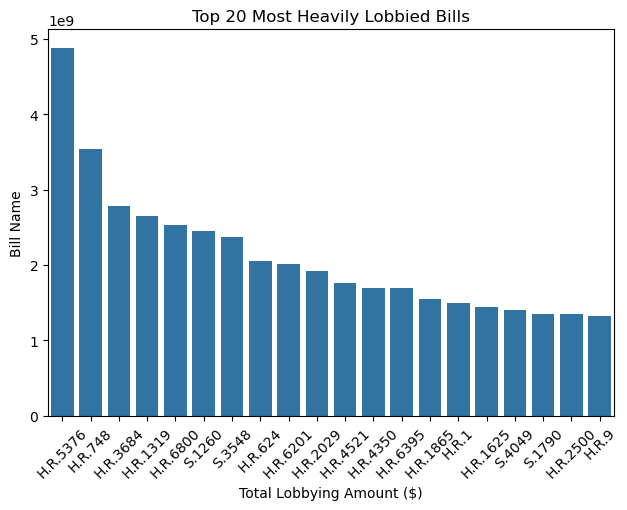

In [ ]:
# Most heavily lobbied bills 
top_bills = df_bill_summary.nlargest(20, "total_amount")

sns.barplot(x="bill_name", y="total_amount", data=top_bills)
plt.title("Top 20 Most Heavily Lobbied Bills")
plt.xlabel("Total Lobbying Amount ($)")
plt.ylabel("Bill Name")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [68]:
#  Most heavily lobbied bills 
top_bills = df_bill_summary.nlargest(100, "total_amount")
top_bills

,b_id,bill_name,congno,total_amount,total_lobbyists,total_agencies,first_year,last_year,num_years
0,hr5376-117,H.R.5376,117.0,4.881270e+09,60679.0,67856.0,2021,2023,3
1,hr748-116,H.R.748,116.0,3.545991e+09,38406.0,45877.0,2019,2020,2
2,hr3684-117,H.R.3684,117.0,2.784538e+09,30321.0,43147.0,2021,2023,3
3,hr1319-117,H.R.1319,117.0,2.653269e+09,30593.0,38830.0,2021,2022,2
4,hr6800-116,H.R.6800,116.0,2.525357e+09,24591.0,30865.0,2020,2021,2
...,...,...,...,...,...,...,...,...,...
95,s1353-113,S.1353,113.0,6.448628e+08,4262.0,4723.0,2013,2015,3
96,s2543-116,S.2543,116.0,6.422729e+08,6773.0,6904.0,2019,2020,2
97,hr644-114,H.R.644,114.0,6.402638e+08,5269.0,7221.0,2015,2016,2
98,s662-113,S.662,113.0,6.351077e+08,3879.0,3921.0,2013,2015,3


In [67]:
# Least lobbied bills 
bottom_bills = df_bill_summary.nsmallest(100, "total_amount")
bottom_bills


,b_id,bill_name,congno,total_amount,total_lobbyists,total_agencies,first_year,last_year,num_years
69610,ZZ3614122,H5489,114.0,0.0,2.0,2.0,2016,2016,1
69611,ZZ3612471,S.AMDT.5185,114.0,0.0,2.0,3.0,2016,2016,1
69612,ZZ3612468,S.AMDT.5185,114.0,0.0,2.0,3.0,2016,2016,1
69613,ZZ3612465,S.AMDT.5185,114.0,0.0,2.0,3.0,2016,2016,1
69614,ZZ3601817,H.AMDT.1030,114.0,0.0,2.0,2.0,2016,2016,1
...,...,...,...,...,...,...,...,...,...
69705,ZZ3937090,H.RES.5265,114.0,0.0,1.0,2.0,2016,2016,1
69706,ZZ3937059,S.AMDT.4750,114.0,0.0,2.0,4.0,2016,2016,1
69707,ZZ3937058,S.AMDT.4751,114.0,0.0,2.0,4.0,2016,2016,1
69708,ZZ1794734,S.AMDT.5185,114.0,0.0,2.0,3.0,2016,2016,1


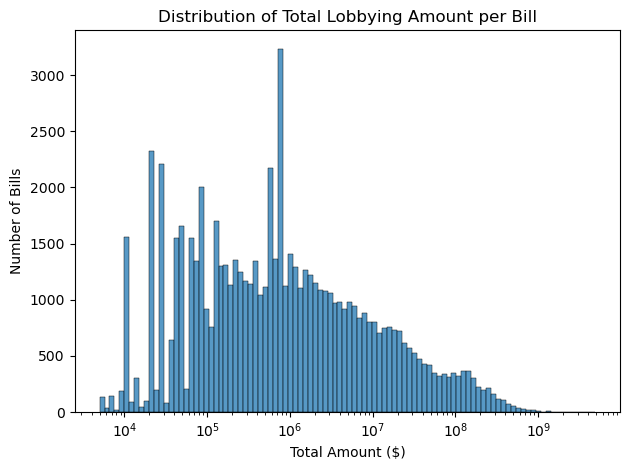

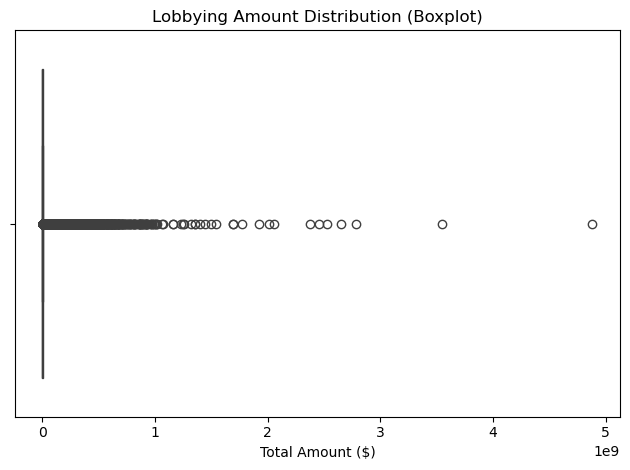

In [69]:
# Amount distribution 
sns.histplot(df_bill_summary["total_amount"], bins=100, log_scale=(True, False))
plt.title("Distribution of Total Lobbying Amount per Bill")
plt.xlabel("Total Amount ($)")
plt.ylabel("Number of Bills")
plt.tight_layout()
plt.show()

# Boxplot to check for outliers
sns.boxplot(x=df_bill_summary["total_amount"])
plt.title("Lobbying Amount Distribution (Boxplot)")
plt.xlabel("Total Amount ($)")
plt.tight_layout()
plt.show()
